# Data Wrangling

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import tornado data from 3 seperate CSV files and concatenate them into 1 file
csv_files = ['tornados_2020_1.csv', 'tornados_2020_2.csv', 'tornados_2020_3.csv']
tornado_2020 = pd.concat((pd.read_csv(f) for f in csv_files))
tornado_2020.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,865220,LAKE CO.,OKAHUMPKA,01/04/2020,1029,Tornado,,EF0,0,1,...,1,NW,OKAHUMPKA,28.7399,-81.9234,28.7589,-81.8907,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,1
1,865221,VOLUSIA CO.,BERESFORD,01/04/2020,1126,Tornado,,EF1,0,0,...,1,ESE,DE LAND,29.0023,-81.3514,29.0264,-81.2841,National Weather Service staff conducted a dam...,A severe thunderstorm moving across central Fl...,2
2,874056,LINCOLN CO.,PRAGUE,01/10/2020,1034,Tornado,,EF0,0,0,...,1,NNE,PRAGUE,35.4864,-96.6952,35.5013,-96.6814,A small tornado developed on the west side of ...,A strong storm system brought an unseasonably ...,3
3,874086,MAYES CO.,MURPHY,01/10/2020,1155,Tornado,,EFU,0,0,...,5,ESE,MURPHY,36.0991,-95.1771,36.1163,-95.1659,Storm chasers positioned in two different loca...,A strong storm system and associated cold fron...,4
4,872580,CEDAR CO.,MASTERS,01/10/2020,1427,Tornado,,EF1,0,0,...,3,ENE,MASTERS,37.6057,-93.6194,37.6110,-93.6147,A National Weather Service survey determined t...,"During the afternoon and evening of the 10th, ...",5


This dataset contains information about every reported tornado in the United States between January 1, 2020 and August 31, 2020. 

In [3]:
# return the number of rows in the data frame
len(tornado_2020.index)

1107

In [4]:
# get some more information about the columns
tornado_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 496
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             1107 non-null   int64  
 1   CZ_NAME_STR          1107 non-null   object 
 2   BEGIN_LOCATION       1107 non-null   object 
 3   BEGIN_DATE           1107 non-null   object 
 4   BEGIN_TIME           1107 non-null   int64  
 5   EVENT_TYPE           1107 non-null   object 
 6   MAGNITUDE            1107 non-null   object 
 7   TOR_F_SCALE          1107 non-null   object 
 8   DEATHS_DIRECT        1107 non-null   int64  
 9   INJURIES_DIRECT      1107 non-null   int64  
 10  DAMAGE_PROPERTY_NUM  1107 non-null   int64  
 11  DAMAGE_CROPS_NUM     1107 non-null   int64  
 12  STATE_ABBR           1107 non-null   object 
 13  CZ_TIMEZONE          1107 non-null   object 
 14  MAGNITUDE_TYPE       1107 non-null   object 
 15  EPISODE_ID           1107 non-null   in

In [5]:
# explore the STATE_ABBR column to see which states had the most tornado events
tornado_2020['STATE_ABBR'].value_counts()[:15].index.tolist()

['MS',
 'TX',
 'AL',
 'IL',
 'MN',
 'GA',
 'SC',
 'FL',
 'LA',
 'NC',
 'AR',
 'TN',
 'OK',
 'CO',
 'IA']

In [6]:
# and what are the corresponding frequencies of these 15 states
tornado_2020['STATE_ABBR'].value_counts()[:15].tolist()

[96, 86, 78, 65, 64, 64, 54, 52, 49, 44, 42, 39, 39, 34, 31]

The number 1 state is Mississippi with 96, and compared to Texas, the second most frequent state, it is less than a fifth of the area, so the events are occuring in a much denser geographic region.

Next, I will import weather data from all of the weather stations with data in Mississippi in 2020.

In [7]:
# import mississippi weather data 
ms_weather_2020 = pd.read_csv('ms_weather_2020.csv')
ms_weather_2020.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-01,33.9,24,0,NaN,...,999.9,NaN,3.6,23,44.4,24,9.9,24,2.2,24
1,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-02,58.1,24,10000,NaN,...,999.9,NaN,994.1,24,62.4,24,7.4,24,8.4,24
2,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-03,58.7,24,10000,NaN,...,999.9,NaN,995.0,23,60.8,24,9.2,24,3.9,24
3,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-04,45.8,24,100000,NaN,...,999.9,NaN,4.9,23,55.9,24,8.5,24,8.4,24
4,72235893919,"MCCOMB AIRPORT, MS US",31.1827,-90.4708,125.9,2020-01-05,35.9,24,0,NaN,...,999.9,NaN,12.6,23,45.6,24,9.6,24,2.2,24


In [8]:
ms_weather_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATION            10754 non-null  int64  
 1   NAME               10754 non-null  object 
 2   LATITUDE           10754 non-null  float64
 3   LONGITUDE          10754 non-null  float64
 4   ELEVATION          10754 non-null  float64
 5   DATE               10754 non-null  object 
 6   DEWP               10754 non-null  float64
 7   DEWP_ATTRIBUTES    10754 non-null  int64  
 8   FRSHTT             10754 non-null  int64  
 9   FRSHTT_ATTRIBUTES  0 non-null      float64
 10  GUST               10754 non-null  float64
 11  GUST_ATTRIBUTES    0 non-null      float64
 12  MAX                10754 non-null  float64
 13  MAX_ATTRIBUTES     10754 non-null  object 
 14  MIN                10754 non-null  float64
 15  MIN_ATTRIBUTES     10754 non-null  object 
 16  MXSPD              107

This is daily weather data from 37 different weather stations in Mississippi from the year 2020. While this is nice, there were only 96 tornados reported in the state in the 8 month period I looked at, so the next step is to broaden the timeframe to almost 5 years, from 01/01/2016 to 08/31/2020. This will require importing the tornado event data from this timeframe, as well as the appropriate daily summaries for all available Mississippi weather stations. Once this is completed, I can begin to clean the data and combine it into one large dataframe.

In [9]:
# import the dataset containing Mississippi tornado events from 01/01/16 - 08/31/20
tornado_ms = pd.read_csv('tornado_ms.csv')
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,609831,COPIAH CO.,BEECH GROVE,01/21/2016,1614,Tornado,,EF0,0,0,...,1,SE,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,This weak tornado touched down along Bennett R...,Abundant moisture and instability combined wit...,1
1,618151,LINCOLN CO.,NEW SIGHT,01/21/2016,1625,Tornado,,EF0,0,0,...,5,NW,NEW SIGHT,31.6919,-90.5363,31.6989,-90.5212,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,2
2,618152,COPIAH CO.,PEETSVILLE,01/21/2016,1626,Tornado,,EF1,0,0,...,4,WNW,BEAUREGARD,31.6989,-90.5212,31.7334,-90.4597,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,3
3,609832,SIMPSON CO.,BUSH,01/21/2016,1720,Tornado,,EF1,0,0,...,2,NE,PINOLA,31.8656,-90.0125,31.8835,-89.9496,The tornado started off of Highway 472 where i...,Abundant moisture and instability combined wit...,4
4,609833,SCOTT CO.,HOMEWOOD,01/21/2016,1746,Tornado,,EF0,0,0,...,3,NNE,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,This weak tornado snapped a handful of large p...,Abundant moisture and instability combined wit...,5


In [10]:
tornado_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             450 non-null    int64  
 1   CZ_NAME_STR          450 non-null    object 
 2   BEGIN_LOCATION       450 non-null    object 
 3   BEGIN_DATE           450 non-null    object 
 4   BEGIN_TIME           450 non-null    int64  
 5   EVENT_TYPE           450 non-null    object 
 6   MAGNITUDE            450 non-null    object 
 7   TOR_F_SCALE          450 non-null    object 
 8   DEATHS_DIRECT        450 non-null    int64  
 9   INJURIES_DIRECT      450 non-null    int64  
 10  DAMAGE_PROPERTY_NUM  450 non-null    int64  
 11  DAMAGE_CROPS_NUM     450 non-null    int64  
 12  STATE_ABBR           450 non-null    object 
 13  CZ_TIMEZONE          450 non-null    object 
 14  MAGNITUDE_TYPE       450 non-null    object 
 15  EPISODE_ID           450 non-null    int

In [11]:
# check to see if there are any missing values in the data
missing = pd.concat([tornado_ms.isnull().sum(), 100 * tornado_ms.isnull().mean()], axis = 1)
missing.columns = ['count', '%']
missing.sort_values(by = 'count', ascending = False).head()

,count,%
EVENT_ID,0,0.0
INJURIES_INDIRECT,0,0.0
SOURCE,0,0.0
FLOOD_CAUSE,0,0.0
TOR_LENGTH,0,0.0


This makes it seem as though every value is non-empty, but a quick glance at the head of the dataframe reveals that the MAGNITUDE column has some blank values. Let's explore how many columns contain values as such.

In [12]:
# loop through every column to check for blank values
for column in tornado_ms:
    if len(tornado_ms.loc[tornado_ms[column] == ' ']) > 0:
        print(column)

MAGNITUDE
MAGNITUDE_TYPE
FLOOD_CAUSE


In [13]:
# check to see how many values are blank in each of these columns
ls1 = ['MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE']
k = 0
while k < len(ls1):
    num = len(tornado_ms.loc[tornado_ms[ls1[k]] == ' '])
    print(ls1[k], ': ', num)
    k+=1

MAGNITUDE :  450
MAGNITUDE_TYPE :  450
FLOOD_CAUSE :  450


In [14]:
# do the same thing for 0 values
for column in tornado_ms:
    if len(tornado_ms.loc[tornado_ms[column] == 0]) > 0:
        print(column)

BEGIN_TIME
DEATHS_DIRECT
INJURIES_DIRECT
DAMAGE_PROPERTY_NUM
DAMAGE_CROPS_NUM
INJURIES_INDIRECT
DEATHS_INDIRECT
BEGIN_RANGE
END_RANGE


In [15]:
ls2 = ['BEGIN_TIME', 'DEATHS_DIRECT', 'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM', \
      'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'BEGIN_RANGE', 'END_RANGE']
k = 0
while k < len(ls2):
    num = len(tornado_ms.loc[tornado_ms[ls2[k]] == 0])
    print(ls2[k], ': ', num)
    k+=1

BEGIN_TIME :  1
DEATHS_DIRECT :  442
INJURIES_DIRECT :  427
DAMAGE_PROPERTY_NUM :  58
DAMAGE_CROPS_NUM :  397
INJURIES_INDIRECT :  447
DEATHS_INDIRECT :  448
BEGIN_RANGE :  24
END_RANGE :  15


All 3 columns with ' ' values are completely void of data, so they can be dumped. As for the 0 values, there are 4 such columns with less than 10% being non-zero, and these attributes like number of deaths and injuries represnts effects of the tornados, so it would be appropriate to get rid of these columns as well.

In [16]:
# drop the 3 columns with no data, as well as the 4 columns with a significant number of 0 values
alt1 = tornado_ms.drop(tornado_ms[ls1], axis=1)
tornado_ms = alt1.drop(alt1[['DEATHS_DIRECT', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT']], axis=1)
tornado_ms.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,609831,COPIAH CO.,BEECH GROVE,01/21/2016,1614,Tornado,EF0,17000,0,MS,...,1,SE,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,This weak tornado touched down along Bennett R...,Abundant moisture and instability combined wit...,1
1,618151,LINCOLN CO.,NEW SIGHT,01/21/2016,1625,Tornado,EF0,10000,0,MS,...,5,NW,NEW SIGHT,31.6919,-90.5363,31.6989,-90.5212,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,2
2,618152,COPIAH CO.,PEETSVILLE,01/21/2016,1626,Tornado,EF1,155000,0,MS,...,4,WNW,BEAUREGARD,31.6989,-90.5212,31.7334,-90.4597,This weak tornado touched down just north of t...,Abundant moisture and instability combined wit...,3
3,609832,SIMPSON CO.,BUSH,01/21/2016,1720,Tornado,EF1,17000,0,MS,...,2,NE,PINOLA,31.8656,-90.0125,31.8835,-89.9496,The tornado started off of Highway 472 where i...,Abundant moisture and instability combined wit...,4
4,609833,SCOTT CO.,HOMEWOOD,01/21/2016,1746,Tornado,EF0,9000,0,MS,...,3,NNE,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,This weak tornado snapped a handful of large p...,Abundant moisture and instability combined wit...,5


In [45]:
# make sure that there aren't any rogue values that don't belong
tornado_ms.describe()

,EVENT_ID,BEGIN_TIME,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,EPISODE_ID,CZ_FIPS,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
count,450.000000,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,780883.484444,1273.371111,2.446780e+05,20174.444444,129707.100000,85.026667,4.728356,371.064978,2.920000,3.035556,32.409740,-89.620578,32.444530,-89.557941,225.500000
std,90010.183289,568.587311,9.430799e+05,91607.489848,14451.231014,45.170296,5.018368,471.236394,3.713312,4.366156,1.085854,0.740019,1.085932,0.736148,130.048068
min,609831.000000,0.000000,0.000000e+00,0.000000,101941.000000,1.000000,0.010000,1.910000,0.000000,0.000000,30.330200,-91.425500,30.346700,-91.412000,1.000000
25%,692058.500000,824.750000,1.000000e+04,0.000000,115032.000000,49.000000,1.302500,100.000000,1.000000,1.000000,31.676600,-90.147750,31.707475,-90.082575,113.250000
50%,813811.500000,1431.000000,3.000000e+04,0.000000,135634.000000,85.000000,2.920000,200.000000,2.000000,2.000000,32.335200,-89.595750,32.359250,-89.528900,225.500000
75%,865265.750000,1640.500000,1.137500e+05,0.000000,144130.000000,123.000000,6.202500,447.500000,4.000000,3.000000,33.027175,-89.033525,33.052300,-88.943575,337.750000
max,918673.000000,2357.000000,1.500000e+07,800000.000000,152501.000000,163.000000,32.160000,3960.000000,59.000000,60.000000,34.953600,-88.195700,34.960500,-88.130000,450.000000


In [17]:
# now let's import the weather data
weather_ms = pd.read_csv('weather_ms.csv')
weather_ms.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,24,10000,NaN,...,999.9,NaN,10.7,23,45.5,24,9.9,24,9.3,24
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,24,0,NaN,...,999.9,NaN,12.1,23,43.5,24,10.0,24,6.5,24
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,24,10000,NaN,...,999.9,NaN,7.4,23,46.2,24,10.0,24,3.9,24
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,24,0,NaN,...,999.9,NaN,7.9,23,44.9,24,10.0,24,6.9,24
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,24,0,NaN,...,999.9,NaN,12.2,23,39.2,24,10.0,24,4.5,24


In [18]:
weather_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49897 entries, 0 to 49896
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATION            49897 non-null  int64  
 1   NAME               49897 non-null  object 
 2   LATITUDE           49897 non-null  float64
 3   LONGITUDE          49897 non-null  float64
 4   ELEVATION          49897 non-null  float64
 5   DATE               49897 non-null  object 
 6   DEWP               49897 non-null  float64
 7   DEWP_ATTRIBUTES    49897 non-null  int64  
 8   FRSHTT             49897 non-null  int64  
 9   FRSHTT_ATTRIBUTES  0 non-null      float64
 10  GUST               49897 non-null  float64
 11  GUST_ATTRIBUTES    0 non-null      float64
 12  MAX                49897 non-null  float64
 13  MAX_ATTRIBUTES     49897 non-null  object 
 14  MIN                49897 non-null  float64
 15  MIN_ATTRIBUTES     49897 non-null  object 
 16  MXSPD              498

A quick glance at the data and the columns shows that the columns ending in ATTRIBUTES are either filled with the same number or no number at all. They don't really provide any useful information.

In [19]:
# create a new data frame without the ATTRIBUTES columns
cols = [c for c in weather_ms.columns if c[-10:] != 'ATTRIBUTES']
weather_ms_2 = weather_ms[cols]
weather_ms_2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-01,36.2,10000,20.0,52.0,41.0,12.0,0.08,1026.1,999.9,10.7,45.5,9.9,9.3
1,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-02,31.7,0,999.9,51.1,39.9,8.9,0.01,1027.7,999.9,12.1,43.5,10.0,6.5
2,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-03,35.2,10000,999.9,54.0,42.1,8.0,0.00,1022.8,999.9,7.4,46.2,10.0,3.9
3,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-04,32.7,0,17.1,55.0,37.0,12.0,0.00,1023.3,999.9,7.9,44.9,10.0,6.9
4,72235893919,"MCCOMB PIKE COUNTY JOHN E LEWIS FIELD AIRPORT,...",31.1827,-90.4708,125.9,2016-01-05,27.3,0,999.9,54.0,28.9,8.0,0.00,1027.7,999.9,12.2,39.2,10.0,4.5


In [20]:
# check the statistical attributes of each column
weather_ms_2.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,4.989700e+04,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,49897.000000,4.989700e+04,49897.000000,49897.000000,49897.000000,49897.000000
mean,7.532555e+10,32.705381,-89.559735,75.581441,755.647402,12308.603744,468.188530,87.593040,66.211129,85.202720,12.558744,5418.971381,9.999000e+02,224.767762,65.553103,110.412023,75.938884
std,7.966055e+09,1.432328,0.861786,40.721230,2542.178844,29563.326504,488.073892,323.541192,314.980940,259.505629,32.990386,4490.159342,2.273760e-13,407.656330,14.357920,300.063760,256.120462
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,0.000000,9.900000,19.400000,-0.400000,1.000000,0.000000,990.300000,9.999000e+02,0.000000,8.700000,0.500000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,46.600000,0.000000,19.000000,68.000000,44.600000,8.900000,0.000000,1017.200000,9.999000e+02,6.600000,55.000000,9.000000,2.900000
50%,7.223589e+10,32.337800,-89.434800,80.500000,61.900000,0.000000,28.900000,80.100000,59.000000,11.100000,0.000000,1030.400000,9.999000e+02,11.800000,68.300000,9.900000,4.700000
75%,7.475709e+10,33.861130,-88.744200,104.200000,71.600000,10000.000000,999.900000,89.100000,69.800000,15.000000,0.110000,9999.900000,9.999000e+02,21.900000,78.100000,10.000000,7.300000
max,9.999996e+10,34.978610,-88.416667,164.600000,9999.900000,111000.000000,999.900000,9999.900000,9999.900000,999.900000,99.990000,9999.900000,9.999000e+02,999.900000,93.200000,999.900000,999.900000


A few observations: Most of the max values are 99.99 or 999.9 or 9999.9 which typically represent missing data. This can be checked with a count of each of these values for each row to see if a significant number of these values exist (which is statistically improbable if they were real data measurements).

Also, the FRSHTT column has a strange distribution which can be investigated by looking at the total number of unique values in the column.

In [21]:
columns = weather_ms_2.columns
k = 0
while k < len(columns):
    num = len(weather_ms_2.loc[(weather_ms_2[columns[k]] == 99.99) | (weather_ms_2[columns[k]] == 999.9) | (weather_ms_2[columns[k]] == 9999.9)])
    print(columns[k], ': ', num)
    k+=1

STATION :  0
NAME :  0
LATITUDE :  0
LONGITUDE :  0
ELEVATION :  0
DATE :  0
DEWP :  3508
FRSHTT :  0
GUST :  22816
MAX :  53
MIN :  50
MXSPD :  3716
PRCP :  6218
SLP :  24449
SNDP :  49897
STP :  7181
TEMP :  0
VISIB :  5098
WDSP :  3560


In [22]:
# check number of days where PRCP = .00
len(weather_ms_2.loc[(weather_ms_2['PRCP'] == .00)])

33343

There are 11 columns that have these kinds of values, and they are all weather measurements. One such column, SNDP, has only 999.9 values, so we can remove this from the data. As for the others, we must appropriately deal with the missing values.

In [23]:
weather_ms_2.FRSHTT.unique()

array([ 10000,      0, 100000,  10010,  11010, 110010, 110000,  11000,
       111000,   1000,     10, 101000, 100010, 110110,  10011,  11110])

After researching this column, it is the indicator column, with 6 digit numbers representing the occurence of Fog, Rain, Snow, Hail, Thunder, and Tornado. This column may come in handy when we join the two datasets, since a 1 value as the last digit represents the occurence of a tornado.

In [24]:
# drop the SNDP column
weather_ms_2 = weather_ms_2.drop('SNDP', axis=1)

In [25]:
# Let's see if these columns have any 0 values in them 
cols = ['DEWP', 'GUST', 'MAX', 'MIN', 'MXSPD', 'SLP', 'STP', 'VISIB', 'WDSP']
k = 0
while k < len(cols):
    num = len(weather_ms_2.loc[weather_ms_2[cols[k]] == 0.0])
    print(cols[k], ': ', num)
    k+=1

DEWP :  0
GUST :  0
MAX :  0
MIN :  0
MXSPD :  0
SLP :  0
STP :  119
VISIB :  0
WDSP :  209


The dataset documentation states that missing values are replaced by 999.9 or similar type values. Thus we can assume that all of these values are missing and convert them to NaN values. First, I am going to carefully look at the distributions of each column to see if the data is appropriately distributed.

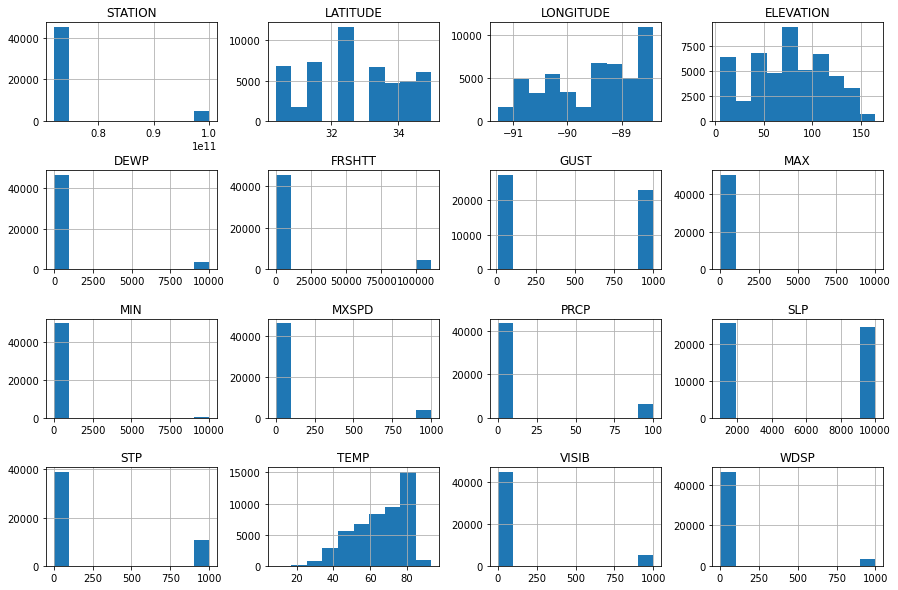

In [26]:
weather_ms_2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Clearly, the data is skewed by the missing values. Let's try and look at each column of interest independently since there are only 10 columns with numerical data of interest. It is evident that the TEMP (Mean temperature for the day in degrees Fahrenheit to tenths) column has no missing values based on its histogram above, so we can assume this column is good to go.

(array([6.0000e+00, 8.0000e+00, 2.4900e+02, 1.4570e+03, 5.7410e+03,
        7.7420e+03, 1.0915e+04, 1.8143e+04, 2.1280e+03, 0.0000e+00]),
 array([-23.2 , -10.88,   1.44,  13.76,  26.08,  38.4 ,  50.72,  63.04,
         75.36,  87.68, 100.  ]),
 <BarContainer object of 10 artists>)

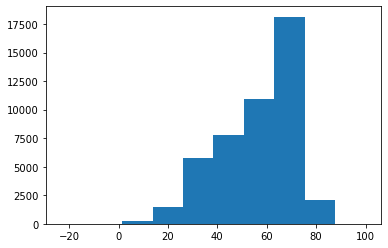

In [27]:
# histogram for DEWP (Mean dew point for the day in degrees Fahrenheit to tenths) column
plt.hist(weather_ms_2['DEWP'], range=[min(weather_ms_2['DEWP']),100])

(array([1.2243e+04, 1.1717e+04, 2.7480e+03, 3.2000e+02, 4.3000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  9.9 ,  18.91,  27.92,  36.93,  45.94,  54.95,  63.96,  72.97,
         81.98,  90.99, 100.  ]),
 <BarContainer object of 10 artists>)

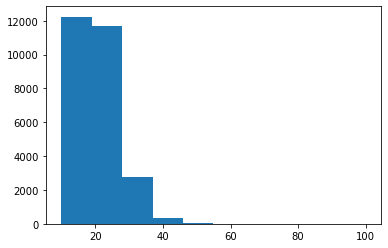

In [28]:
# histogram for GUST (Maximum wind gust reported for the day in knots to tenths) column 
plt.hist(weather_ms_2['GUST'], range=[min(weather_ms_2['GUST']),100])

(array([   54.,   418.,  1680.,  4643.,  7345., 10620., 14300., 10677.,
          107.,     0.]),
 array([ 19.4 ,  29.46,  39.52,  49.58,  59.64,  69.7 ,  79.76,  89.82,
         99.88, 109.94, 120.  ]),
 <BarContainer object of 10 artists>)

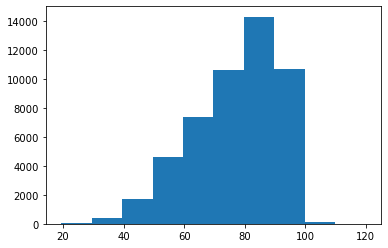

In [29]:
# histogram for MAX (Maximum temperature reported during the day in Fahrenheit to tenths) column
plt.hist(weather_ms_2['MAX'], range=[min(weather_ms_2['MAX']),120])

(array([3.2000e+01, 3.4100e+02, 2.3280e+03, 6.2280e+03, 7.3370e+03,
        9.0210e+03, 1.2793e+04, 1.1609e+04, 1.5600e+02, 2.0000e+00]),
 array([ -0.4 ,   9.64,  19.68,  29.72,  39.76,  49.8 ,  59.84,  69.88,
         79.92,  89.96, 100.  ]),
 <BarContainer object of 10 artists>)

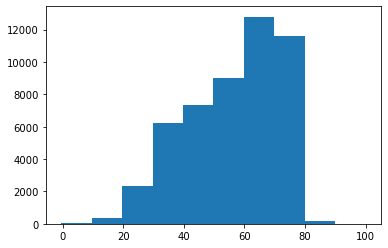

In [30]:
# histogram for MIN (Minimum temperature reported during the day in Fahrenheit to tenths) column)
plt.hist(weather_ms_2['MIN'], range=[min(weather_ms_2['MIN']),100])

(array([1.5740e+03, 2.0061e+04, 1.6635e+04, 6.0130e+03, 1.5090e+03,
        3.0400e+02, 5.7000e+01, 1.9000e+01, 4.0000e+00, 4.0000e+00]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

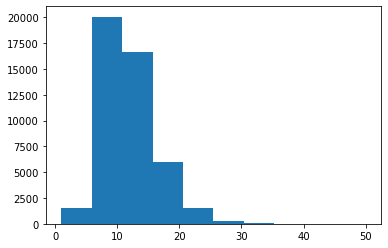

In [31]:
# histogram for MXSP (Maximum sustained wind speed reported for the day in knots to tenths) column
plt.hist(weather_ms_2['MXSPD'], range=[min(weather_ms_2['MXSPD']),50])

(array([   29.,    43.,   551.,  4763., 12721.,  5524.,  1545.,   244.,
           28.,     0.]),
 array([ 990.3 ,  996.27, 1002.24, 1008.21, 1014.18, 1020.15, 1026.12,
        1032.09, 1038.06, 1044.03, 1050.  ]),
 <BarContainer object of 10 artists>)

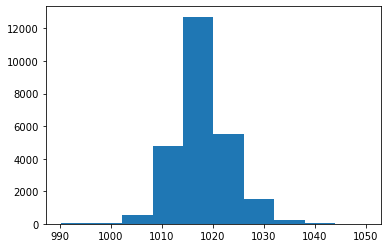

In [32]:
# histogram for SLP (Mean sea level pressure for the day in millibars to tenths) column
plt.hist(weather_ms_2['SLP'], range=[min(weather_ms_2['SLP']),1050])

(array([ 8628., 12069., 10099.,  5570.,  2055.,   526.,   104.,    15.,
            0.,     0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

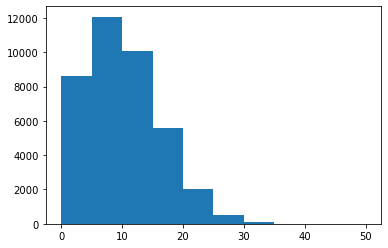

In [33]:
# histogram for STP (Mean station pressure for the day in millibars to tenths) column
plt.hist(weather_ms_2['STP'], range=[0,50])

(array([2.1000e+01, 6.6000e+01, 2.4200e+02, 3.8500e+02, 1.0580e+03,
        2.3130e+03, 5.0540e+03, 1.1167e+04, 2.4471e+04, 2.2000e+01]),
 array([ 0.5 ,  1.65,  2.8 ,  3.95,  5.1 ,  6.25,  7.4 ,  8.55,  9.7 ,
        10.85, 12.  ]),
 <BarContainer object of 10 artists>)

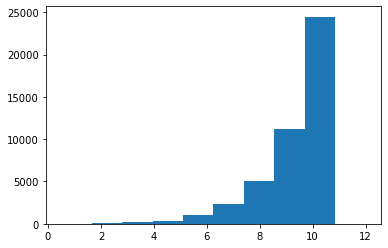

In [34]:
# histogram for VISIB (Mean visibility for the day in miles to tenths) column
plt.hist(weather_ms_2['VISIB'], range=[min(weather_ms_2['VISIB']),12])

(array([9.0720e+03, 1.7385e+04, 1.1354e+04, 5.6290e+03, 2.1280e+03,
        6.1200e+02, 1.3100e+02, 1.8000e+01, 7.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

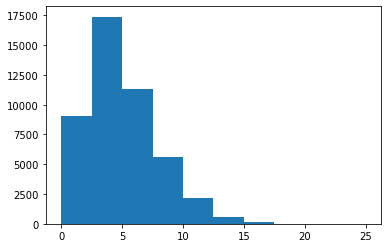

In [35]:
# histogram for WDSP (Mean wind speed for the day in knots to tenths) column
plt.hist(weather_ms_2['WDSP'], range=[min(weather_ms_2['WDSP']),25])

The above histograms show nothing unusual. Most features are skewed in one direction, but this makes sense being that some data points have an absolute cutoff points (like wind speed and visibility). Now that it is clear that the columns have nothing too unusual about their distributions, I can replace the empty values with NaN and then recheck the statistical points to see if there are any other outliers.

In [36]:
# replace missing values with NaN values
weather_ms_2.replace([99.99, 999.9, 9999.9], np.nan, inplace=True)

In [37]:
# after looking at STP values, they have a lot of variations of missing values in the 990.0-999.9 range,
# so these values can be dealt with by masking the range
weather_ms_2['STP'] = weather_ms_2['STP'].mask(weather_ms_2['STP'] > 500, np.nan)

In [38]:
# check the maximum values to see if they are more appropriate
weather_ms_2.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
count,4.989700e+04,49897.000000,49897.000000,49897.000000,46389.000000,49897.000000,27081.000000,49844.00000,49847.000000,46181.000000,43679.000000,25448.000000,39066.000000,49897.000000,44799.000000,46337.000000
mean,7.532555e+10,32.705381,-89.559735,75.581441,56.584302,12308.603744,20.216561,77.05311,56.246950,11.600695,0.112316,1017.874092,10.140183,65.553103,9.190797,4.952381
std,7.966055e+09,1.432328,0.861786,40.721230,15.656333,29563.326504,5.996612,14.21275,15.171772,4.440639,0.395396,5.301145,6.085193,14.357920,1.245179,2.862296
min,7.205415e+10,30.350000,-91.283330,5.000000,-23.200000,0.000000,9.900000,19.40000,-0.400000,1.000000,0.000000,990.300000,0.000000,8.700000,0.500000,0.000000
25%,7.221656e+10,31.606000,-90.346670,42.700000,45.300000,0.000000,15.900000,68.00000,44.600000,8.000000,0.000000,1014.600000,5.500000,55.000000,8.900000,2.800000
50%,7.223589e+10,32.337800,-89.434800,80.500000,60.100000,0.000000,19.000000,80.10000,59.000000,11.100000,0.000000,1017.300000,9.500000,68.300000,9.800000,4.400000
75%,7.475709e+10,33.861130,-88.744200,104.200000,70.100000,10000.000000,22.900000,89.10000,69.800000,14.000000,0.000000,1020.900000,14.000000,78.100000,10.000000,6.600000
max,9.999996e+10,34.978610,-88.416667,164.600000,87.600000,111000.000000,69.000000,109.40000,91.400000,53.000000,8.060000,1042.400000,38.600000,93.200000,12.000000,24.700000


The max values look much better. Now let's quantify the missing data.

In [39]:
# check to see count and % missing values in the data
missing = pd.concat([weather_ms_2.isnull().sum(), 100 * weather_ms_2.isnull().mean()], axis = 1)
missing.columns = ['count', '%']
missing.sort_values(by = 'count', ascending = False)

,count,%
SLP,24449,48.998938
GUST,22816,45.726196
STP,10831,21.706716
PRCP,6218,12.461671
VISIB,5098,10.217047
MXSPD,3716,7.447342
WDSP,3560,7.134697
DEWP,3508,7.030483
MAX,53,0.106219
MIN,50,0.100206


In [40]:
# now look at the rows with the most missing data
missing = pd.concat([weather_ms_2.isnull().sum(axis=1), 100 * weather_ms_2.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
48544,8,44.444444
24948,7,38.888889
25845,7,38.888889
25843,7,38.888889
25842,7,38.888889
25841,7,38.888889
25840,7,38.888889
25839,7,38.888889
25838,7,38.888889
25837,7,38.888889


In [41]:
# return the attributes for station with 8 missing values
weather_ms_2.iloc[48544]

STATION                   99999923803
NAME         HOLLY SPRINGS 4 N, MS US
LATITUDE                      34.8223
LONGITUDE                    -89.4348
ELEVATION                       147.5
DATE                       2016-12-18
DEWP                              NaN
FRSHTT                              0
GUST                              NaN
MAX                               NaN
MIN                              23.9
MXSPD                             NaN
PRCP                             0.47
SLP                               NaN
STP                               NaN
TEMP                             36.8
VISIB                             NaN
WDSP                              NaN
Name: 48544, dtype: object

This location still has min temperature, precipitation, and average temperature attributes, which will be helpful for the later modeling, so removing entire rows doesn't seem appropriate.

In [42]:
# return number of rows per number of missing values
missing['count'].value_counts(normalize=True, sort=False)

0    0.215965
1    0.411488
2    0.204060
3    0.092430
4    0.005511
5    0.001223
6    0.001042
7    0.068261
8    0.000020
Name: count, dtype: float64

About 83% of rows have 0-2 missing values.

In [43]:
weather_ms_2.shape

(49897, 18)

In [44]:
tornado_ms.shape

(450, 30)

The datasets are both usable. The weather_ms_2 dataframe now has missing values in the form of NaN. The tornado_ms datframe contains mostly description columns, that will potentially be used as keys to merge the two datasets. This is the final step of the data wrangling process.